In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
os.chdir("/Users/kausshik/HON322M/Lab5")

# Understand data 

In [3]:
data = pd.read_csv('tweets_sentiment.csv')

In [4]:
data

,Unnamed: 0,tweets,sentiment
0,0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,2,@DespiteOfficial we had a listen last night :)...,1
3,3,@97sides CONGRATS :),1
4,4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...,...
9995,9995,I wanna change my avi but uSanele :(,0
9996,9996,MY PUPPY BROKE HER FOOT :(,0
9997,9997,where's all the jaebum baby pictures :((,0
9998,9998,But but Mr Ahmad Maslan cooks too :( https://t...,0


In [8]:
# Randomly select one spam email
happy_sample = data[data['sentiment'] == 1].sample(n=1)

# Randomly select one not spam email
sad_sample = data[data['sentiment'] == 0].sample(n=1)

# Print the samples
print("Happy tweet sample:")
print(happy_sample['tweets'].values[0])
print("=" * 100)
print("Sad tweet sample:")
print(sad_sample['tweets'].values[0])


Happy tweet sample:
#HappyBirthdayEmilyBett @emilybett :) Wishing you all the best you beautiful,sweet,talented,amazing… https://t.co/humtC1tr3I
Sad tweet sample:
as if not an apology isn't available in australia :(( @BeaMiller


In [9]:
data['tweets'].value_counts()

tweets
#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)                             1
&lt;3 &lt;3 awsme song &lt;3 :-* :-( :-( :'( http://t.co/IjVWwO32eO                                                                         1
sunggyu at the back :( i wonder if he's okay :( https://t.co/MwLo6RSyHW                                                                     1
@nwoje I'm in London in the rain :( but was booking one! Hope you didn't have to hear horrible grumbling about "migrant activity" #gross    1
@madjade24 @bocababy26 :C you don't know? :C daddy doesn't know? &gt;:(                                                                     1
                                                                                                                                           ..
@NoakseyV1 @david_statter @DHGFMadson @saikocat @HIDEO_KOJIMA_EN @drewdixon82 @ghrowe Cheers! :)                                            1

# Data pre-processing

## Split data

In [10]:
X = list(data['tweets'])

In [11]:
y = list(data['sentiment'])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 369,    # produce the same split when run the code multiple times
                                                    stratify = y)    # have same percentage of samples of each target class; e.g., 28% for test for each class

In [13]:
pd.Series(y_train).value_counts()

1    3500
0    3500
Name: count, dtype: int64

In [14]:
pd.Series(y_test).value_counts()

0    1500
1    1500
Name: count, dtype: int64

In [15]:
# Add Lemmatization by extending CountVectorizer
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [16]:
# use LemmaCountVectorizer to perform tokenization, lowercasing, stopwords removing, and lemmatization
Lema_cv = LemmaCountVectorizer(stop_words = 'english')      
Lema_cv_feature_word_train = Lema_cv.fit_transform(X_train).toarray()
Lema_cv_feature_word_test = Lema_cv.transform(X_test).toarray()

In [17]:
Lema_cv_feature_word_train.shape

(7000, 14987)

## Model Training - Naive Bayes

In [18]:
# Instantiate a Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the Multinomial Naive Bayes classifier to the training data.
mnb.fit(Lema_cv_feature_word_train, y_train)

# Use the trained classifier to predict the labels for the test set.
predicted_y = mnb.predict(Lema_cv_feature_word_test)

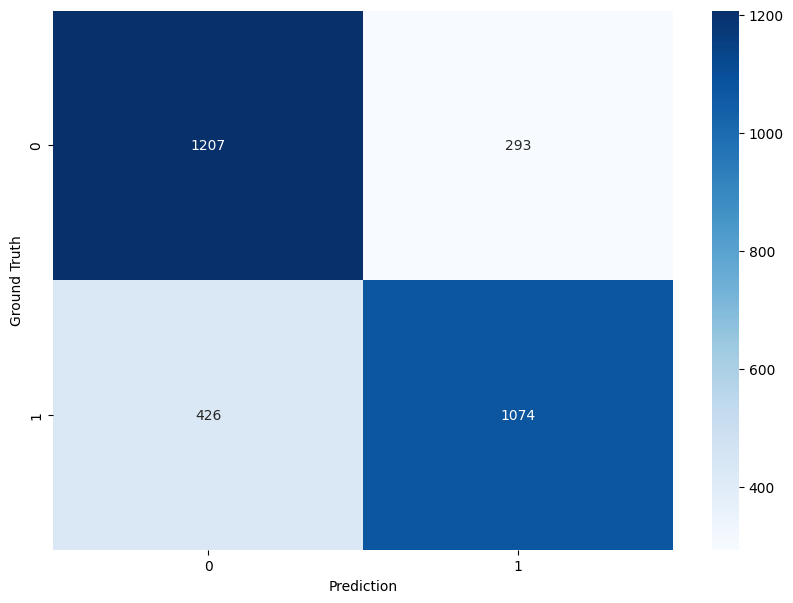

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1500
           1       0.79      0.72      0.75      1500

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.76      0.76      0.76      3000



In [19]:
conf_matrix = confusion_matrix(y_test, predicted_y)       #(y, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show()


print(classification_report(y_test, predicted_y))

 #### The Naive Bayes model predicted the class label with a 95% accuracy. The result demonstrates how well the simple algorithem, a Naive Bayes classifier, can perform for spam email detection.